# **imports and setup**


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Libraries imported. TensorFlow version:", tf.__version__)


Libraries imported. TensorFlow version: 2.19.0


*load dataset and inspect shapes*

Train shape: (60000, 28, 28) Train labels: (60000,)
Test shape: (10000, 28, 28) Test labels: (10000,)


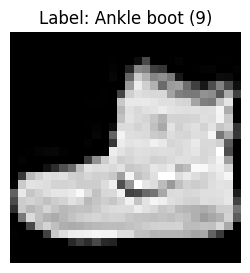

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Train shape:", x_train.shape, "Train labels:", y_train.shape)
print("Test shape:", x_test.shape, "Test labels:", y_test.shape)

# show a sample image (optional)
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {class_names[y_train[0]]} ({y_train[0]})")
plt.axis('off')
plt.show()


*preprocessing for a simple NN (flatten)*

In [24]:

x_train_nn = x_train.astype('float32') / 255.0
x_test_nn  = x_test.astype('float32')  / 255.0

x_train_nn = x_train_nn.reshape(-1, 28*28)
x_test_nn  = x_test_nn.reshape(-1, 28*28)

print("NN input shape:", x_train_nn.shape)


NN input shape: (60000, 784)


*build a simple Neural Network (fully connected)*

In [25]:

nn_model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

nn_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

*train the NN*


In [36]:
epochs_nn = 10
history_nn = nn_model.fit(x_train_nn, y_train,
                          epochs=epochs_nn,
                          batch_size=128,
                          validation_split=0.1,
                          verbose=2)

# evaluate on test set
test_loss_nn, test_acc_nn = nn_model.evaluate(x_test_nn, y_test, verbose=0)
print(f"NN Test accuracy: {test_acc_nn:.4f}")


Epoch 1/10
422/422 - 4s - 8ms/step - accuracy: 0.7534 - loss: 0.6986 - val_accuracy: 0.8442 - val_loss: 0.4227
Epoch 2/10
422/422 - 4s - 9ms/step - accuracy: 0.8343 - loss: 0.4625 - val_accuracy: 0.8578 - val_loss: 0.3774
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.8484 - loss: 0.4208 - val_accuracy: 0.8627 - val_loss: 0.3739
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.8578 - loss: 0.3953 - val_accuracy: 0.8713 - val_loss: 0.3555
Epoch 5/10
422/422 - 2s - 6ms/step - accuracy: 0.8631 - loss: 0.3782 - val_accuracy: 0.8758 - val_loss: 0.3416
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.8682 - loss: 0.3633 - val_accuracy: 0.8753 - val_loss: 0.3441
Epoch 7/10
422/422 - 3s - 7ms/step - accuracy: 0.8700 - loss: 0.3542 - val_accuracy: 0.8705 - val_loss: 0.3501
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.8726 - loss: 0.3459 - val_accuracy: 0.8803 - val_loss: 0.3366
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.8790 - loss: 0.3315 - val_accuracy: 0.8787 - val_loss: 0.3217
E

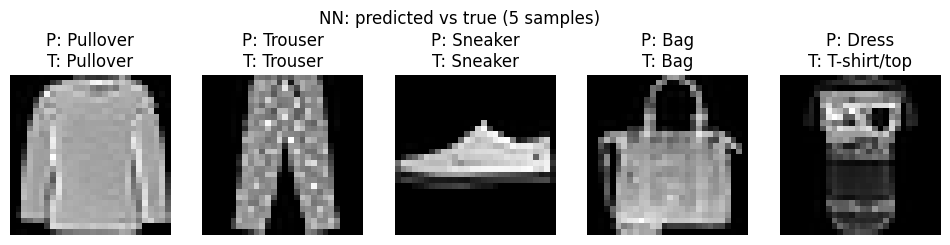

In [40]:
import random
indices = random.sample(range(len(x_test)), 5)

plt.figure(figsize=(12,3))
for i, idx in enumerate(indices):
    img = x_test[idx]        # original 28x28
    img_input = (img.astype('float32')/255.0).reshape(1, 28*28)
    preds = nn_model.predict(img_input, verbose=0)
    pred_label = np.argmax(preds, axis=1)[0]
    true_label = y_test[idx]

    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P: {class_names[pred_label]}\nT: {class_names[true_label]}")
    plt.axis('off')
plt.suptitle("NN: predicted vs true (5 samples)")
plt.show()


In [27]:
#  preprocessing for CNN (reshape to 28x28x1)
x_train_cnn = x_train.astype('float32') / 255.0
x_test_cnn  = x_test.astype('float32')  / 255.0

x_train_cnn = x_train_cnn.reshape(-1,28,28,1)
x_test_cnn  = x_test_cnn.reshape(-1,28,28,1)

print("CNN input shape:", x_train_cnn.shape)


CNN input shape: (60000, 28, 28, 1)


In [28]:
#  build a CNN
cnn_model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Step 9: train the CNN
epochs_cnn = 12
history_cnn = cnn_model.fit(x_train_cnn, y_train,
                            epochs=epochs_cnn,
                            batch_size=128,
                            validation_split=0.1,
                            verbose=2)

# evaluate on test set
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test accuracy: {test_acc_cnn:.4f}")


Epoch 1/12
422/422 - 41s - 97ms/step - accuracy: 0.7765 - loss: 0.6118 - val_accuracy: 0.8568 - val_loss: 0.3950
Epoch 2/12
422/422 - 40s - 96ms/step - accuracy: 0.8587 - loss: 0.3907 - val_accuracy: 0.8772 - val_loss: 0.3312
Epoch 3/12
422/422 - 40s - 94ms/step - accuracy: 0.8758 - loss: 0.3385 - val_accuracy: 0.8868 - val_loss: 0.3063
Epoch 4/12
422/422 - 41s - 98ms/step - accuracy: 0.8866 - loss: 0.3086 - val_accuracy: 0.8928 - val_loss: 0.2873
Epoch 5/12
422/422 - 38s - 90ms/step - accuracy: 0.8961 - loss: 0.2846 - val_accuracy: 0.8990 - val_loss: 0.2733
Epoch 6/12
422/422 - 38s - 91ms/step - accuracy: 0.9027 - loss: 0.2649 - val_accuracy: 0.9062 - val_loss: 0.2650
Epoch 7/12
422/422 - 41s - 97ms/step - accuracy: 0.9084 - loss: 0.2489 - val_accuracy: 0.9068 - val_loss: 0.2617
Epoch 8/12
422/422 - 38s - 90ms/step - accuracy: 0.9151 - loss: 0.2336 - val_accuracy: 0.9097 - val_loss: 0.2540
Epoch 9/12
422/422 - 40s - 95ms/step - accuracy: 0.9187 - loss: 0.2206 - val_accuracy: 0.9080 - 

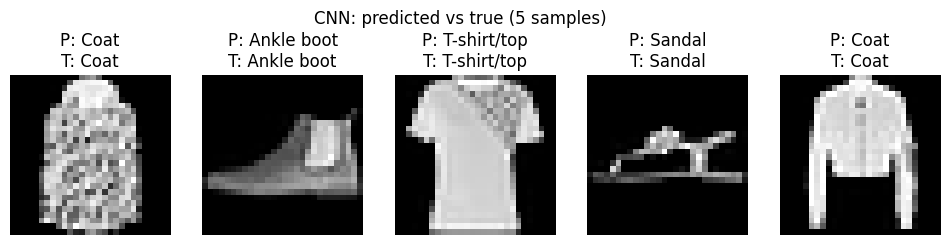

In [30]:
indices = random.sample(range(len(x_test_cnn)), 5)

plt.figure(figsize=(12,3))
for i, idx in enumerate(indices):
    img = x_test[idx]
    img_input = x_test_cnn[idx].reshape(1,28,28,1)
    preds = cnn_model.predict(img_input, verbose=0)
    pred_label = np.argmax(preds, axis=1)[0]
    true_label = y_test[idx]

    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P: {class_names[pred_label]}\nT: {class_names[true_label]}")
    plt.axis('off')
plt.suptitle("CNN: predicted vs true (5 samples)")
plt.show()


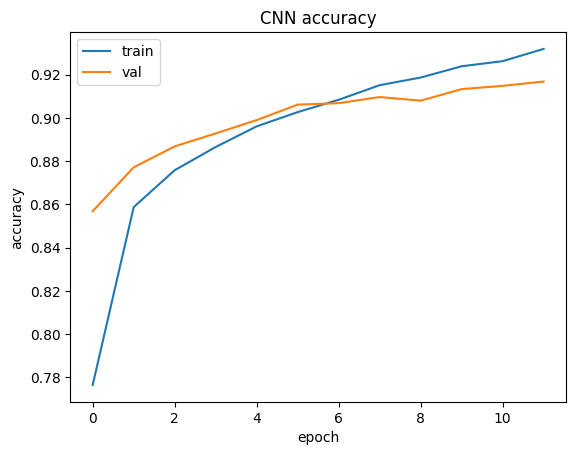

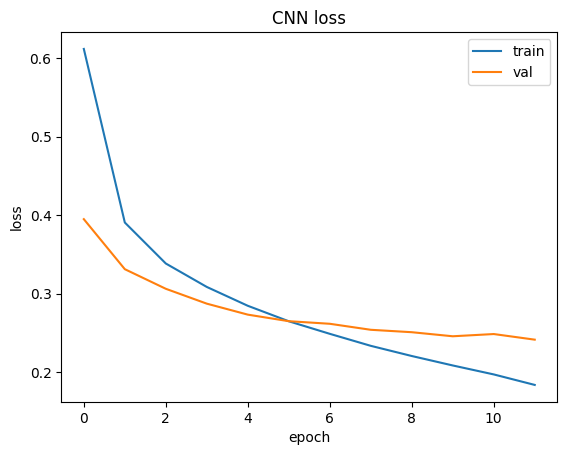

In [41]:
# Step 11b: CNN training history plots
# Accuracy
plt.figure()
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

# Loss
plt.figure()
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


In [42]:
test_loss_nn, test_acc_nn = nn_model.evaluate(x_test_nn, y_test, verbose=0)

print(f"NN Test accuracy  : {test_acc_nn:.2%}")
print(f"CNN Test accuracy : {test_acc_cnn:.2%}")
diff = (test_acc_cnn - test_acc_nn) * 100
print(f"CNN performed better than NN by {diff:.2f} percentage points.")

NN Test accuracy  : 87.48%
CNN Test accuracy : 90.79%
CNN performed better than NN by 3.31 percentage points.
